# 📊 Data Exploration and Visualization (EDA)

This notebook explores the service call dataset:  
We visualize distributions of service calls by city, time, day, season, and more.

Understanding the patterns and relationships in the data is crucial before building predictive models.


In [3]:
# Install required libraries if not installed
#!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Service Calls and Events
data = pd.read_csv('../data/data_filled.csv', low_memory=False)
events = pd.read_csv('../data/events_final.csv', low_memory=False)

print(f"Service Calls shape: {data.shape}")
print(f"Events shape: {events.shape}")

# Display first rows# Set default plot size and font
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Load the dataset
data = pd.read_csv('../data/file_with_weekday.csv', low_memory=False)

print(f"Data shape: {data.shape}")
data.head()
data.head(), events.head()


Service Calls shape: (97159, 14)
Events shape: (821, 3)
Data shape: (98095, 27)


(                אגף            מחלקה                    נושא  \
 0         אגף תפעול     מחלקת תברואה              אספקת פחים   
 1         אגף תפעול     מחלקת תברואה  דיווח על אי פינוי פחים   
 2         אגף תפעול       מדור קנסות      סוגיות חניה ודוחות   
 3  לשכת ראשת המועצה  לשכת ראשת מועצה       תלונות/בקשות כללי   
 4         אגף תפעול     מחלקת תברואה  דיווח על אי פינוי פחים   
 
                                            נושא משנה    סטטוס פנייה  \
 0                          תברואה - פח ירוק חדש/שבור  הטיפול הסתיים   
 1                          תברואה - אי פינוי פח ירוק  הטיפול הסתיים   
 2  חניה - בירורים על חוב / עיקול/דחיית ערעור/בירו...  הטיפול הסתיים   
 3                                       פניות תושבים  הטיפול הסתיים   
 4                          תברואה - אי פינוי פח כתום  הטיפול הסתיים   
 
   חריגה בשעות עבודה (פניות סגורות בלבד) אחוז חריגה (פניות סגורות בלבד)  \
 0                           55.32885683                    0.232215083   
 1                      

## 🔍 Initial Data Overview

We first load the cleaned dataset with weather, event, and weekday features.


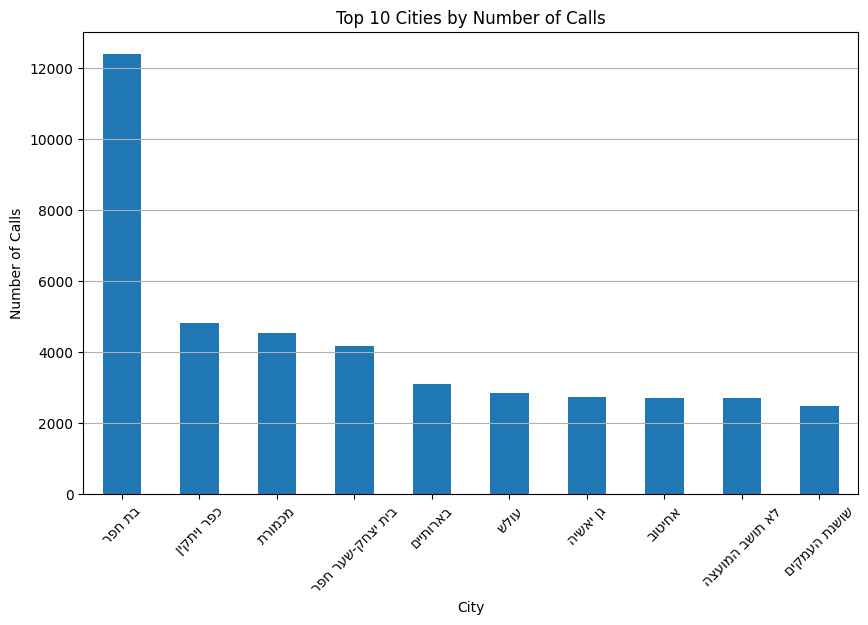

In [5]:
# Calls by City (Top 10)
if 'יישוב' in data.columns:
    city_counts = data['יישוב'].value_counts().head(10)
    city_counts.index = city_counts.index.map(lambda x: x[::-1])
    city_counts.plot(kind='bar')
    plt.title('Top 10 Cities by Number of Calls')
    plt.xlabel('City')
    plt.ylabel('Number of Calls')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ 'יישוב' column not found.")


## 📍 Calls by City

Understanding which cities generate the most service calls helps identify operational hotspots.


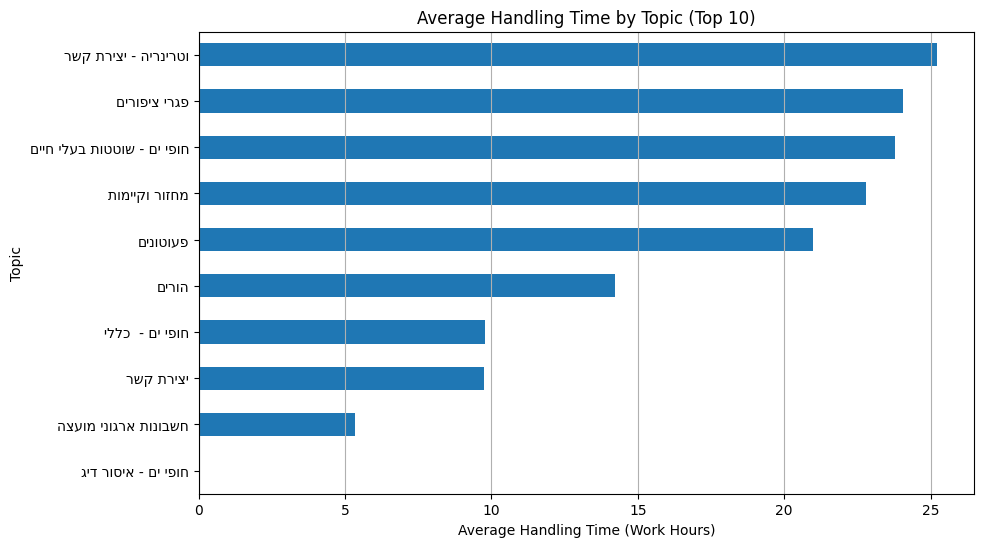

In [6]:
# Average Handling Time by Topic
if 'משך טיפול (בשעות עבודה)' in data.columns and 'נושא' in data.columns:
    avg_duration_by_topic = data.groupby('נושא')['משך טיפול (בשעות עבודה)'].mean().sort_values().head(10)
    avg_duration_by_topic.index = avg_duration_by_topic.index.map(lambda x: x[::-1])
    avg_duration_by_topic.plot(kind='barh')
    plt.title('Average Handling Time by Topic (Top 10)')
    plt.xlabel('Average Handling Time (Work Hours)')
    plt.ylabel('Topic')
    plt.grid(axis='x')
    plt.show()
else:
    print("⚠️ Required columns not found.")


## 🕑 Average Handling Time by Topic

Analyzing topics with longer handling times highlights operational bottlenecks and potential process improvements.


C:\Users\mevas\AppData\Local\Temp\ipykernel_35548\259382822.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['שעת פתיחה - שעה'] = pd.to_datetime(data['שעת פתיחה'], errors='coerce').dt.hour


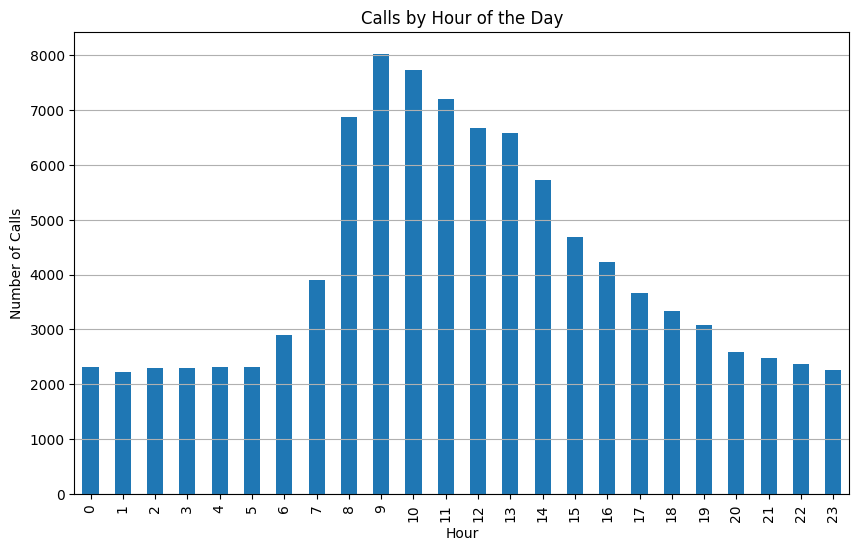

In [7]:
# Calls by Hour
if 'שעת פתיחה' in data.columns:
    data['שעת פתיחה - שעה'] = pd.to_datetime(data['שעת פתיחה'], errors='coerce').dt.hour
    data['שעת פתיחה - שעה'].value_counts().sort_index().plot(kind='bar')
    plt.title('Calls by Hour of the Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Calls')
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ 'שעת פתיחה' column not found.")


## ⏰ Calls by Hour

Demand patterns throughout the day are crucial for workforce planning.


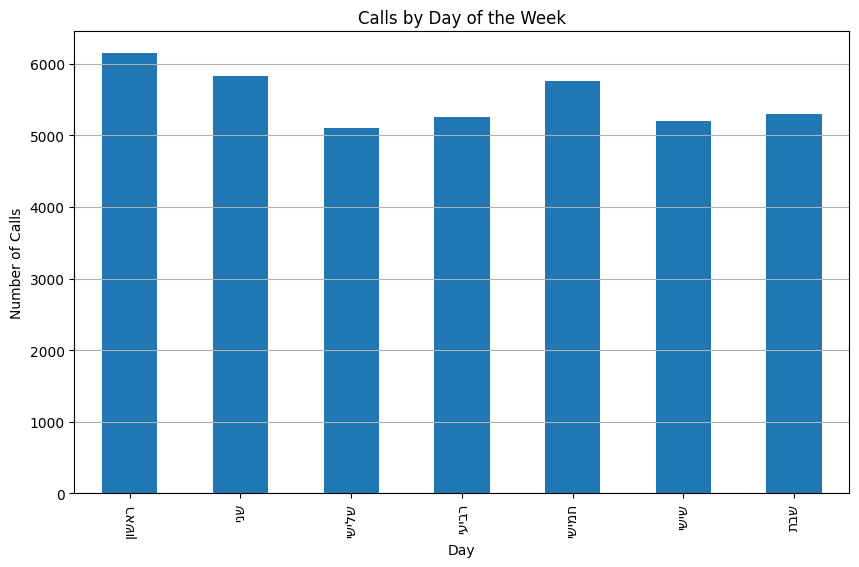

In [11]:
# Calls by Day of the Week (with Hebrew reverse)
if 'יום בשבוע' in data.columns:
    weekday_order = ['ראשון', 'שני', 'שלישי', 'רביעי', 'חמישי', 'שישי', 'שבת']
    plot_data = data['יום בשבוע'].value_counts().reindex(weekday_order)
    plot_data.index = plot_data.index.map(lambda x: x[::-1])  # היפוך עברית
    plot_data.plot(kind='bar')
    plt.title('Calls by Day of the Week')
    plt.xlabel('Day')
    plt.ylabel('Number of Calls')
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ 'יום בשבוע' column not found.")


## 📅 Calls by Day of the Week

This chart shows the distribution of calls across different days of the week.
Hebrew labels are reversed for correct display.


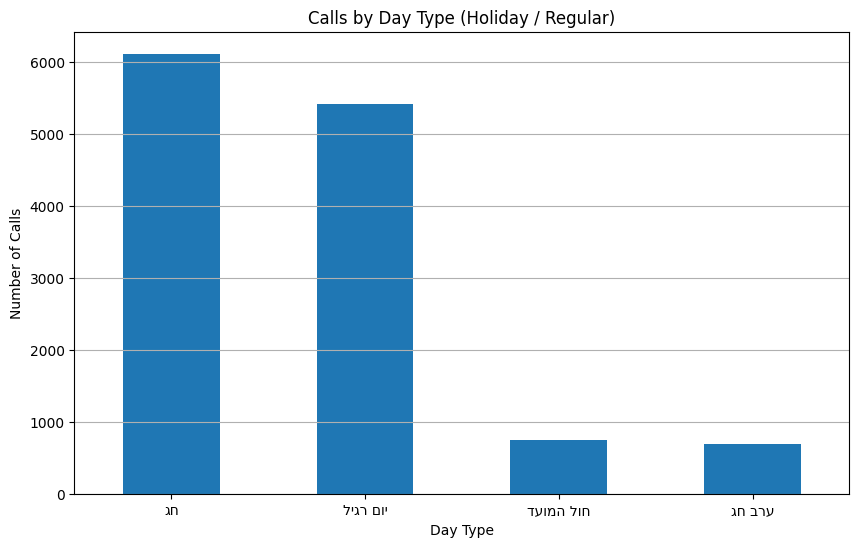

In [22]:
# Calls by Day Type (based on סיווג column)
if 'סיווג' in data.columns:
    plot_data = data['סיווג'].value_counts()
    plot_data.index = plot_data.index.map(lambda x: x[::-1])  # Reverse Hebrew text
    plot_data.plot(kind='bar')
    plt.title('Calls by Day Type (Holiday / Regular)')
    plt.xlabel('Day Type')
    plt.ylabel('Number of Calls')
    plt.xticks(rotation=0, ha='center')  # 🛠️ להציג אופקי
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ 'סיווג' column not found.")


## 🎉 Calls by Day Type

This chart shows the distribution of calls across different day types: holidays, regular days, and others.
Hebrew labels are reversed for proper display.


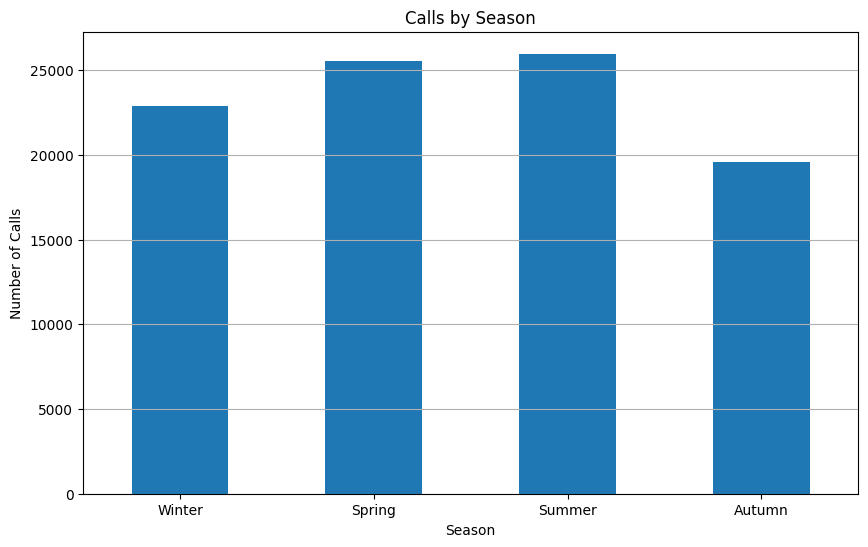

In [28]:
# Calls by Season (no translation, no reverse)
season_cols = ['Winter', 'Spring', 'Summer', 'Autumn']
available_seasons = [col for col in season_cols if col in data.columns]

if available_seasons:
    # Sum calls per season
    season_counts = data[available_seasons].sum()

    # No translation, no reverse
    season_counts.plot(kind='bar')
    plt.title('Calls by Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Calls')
    plt.xticks(rotation=0, ha='center')  # Horizontal labels
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ No season columns found (Winter, Spring, Summer, Autumn).")


## ❄️🌸☀️🍂 Calls by Season

This chart shows the distribution of service calls across the four seasons: Winter, Spring, Summer, and Autumn.
Analyzing seasonal patterns helps anticipate workload fluctuations throughout the year.


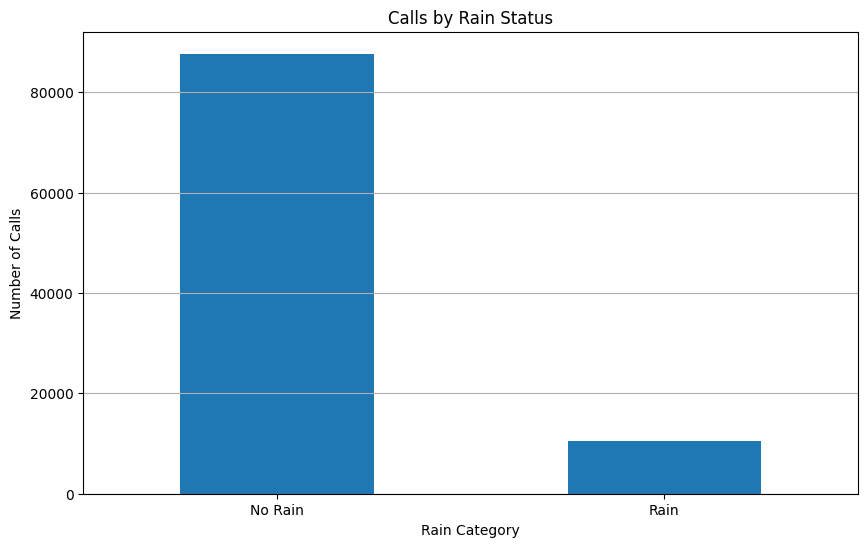

In [33]:
# Simple Rain Categorization (Rain / No Rain)
if 'Rain' in data.columns:
    # Create a temporary series for Rain Category
    rain_category = data['Rain'].apply(
        lambda rain: 'No Rain' if rain == 0 else 'Rain'
    )

    # Plot
    plot_data = rain_category.value_counts()
    plot_data.plot(kind='bar')
    plt.title('Calls by Rain Status')
    plt.xlabel('Rain Category')
    plt.ylabel('Number of Calls')
    plt.xticks(rotation=0, ha='center')
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ 'Rain' column not found.")


## 🌧️ Calls by Rain Status (Simple)

The dataset is divided into two categories based on rain presence:
- No Rain (0 mm)
- Rain (>0 mm)

This simple categorization allows for a clear comparison of service calls on rainy versus non-rainy days.


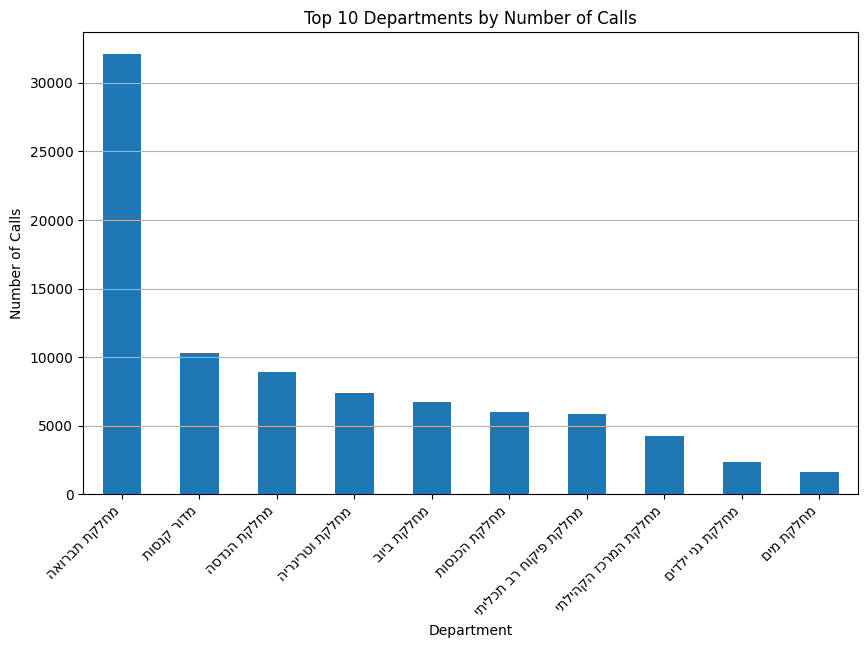

In [34]:
# Calls by Department (Top 10)
if 'מחלקה' in data.columns:
    department_counts = data['מחלקה'].value_counts().head(10)
    department_counts.index = department_counts.index.map(lambda x: x[::-1])  # Reverse Hebrew text
    department_counts.plot(kind='bar')
    plt.title('Top 10 Departments by Number of Calls')
    plt.xlabel('Department')
    plt.ylabel('Number of Calls')
    plt.xticks(rotation=45, ha='right')  # Rotate to avoid overlapping
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ 'מחלקה' column not found.")


## 🏢 Calls by Department (Top 10)

This chart shows the top 10 departments based on the number of service calls.
Hebrew labels are reversed for proper display.


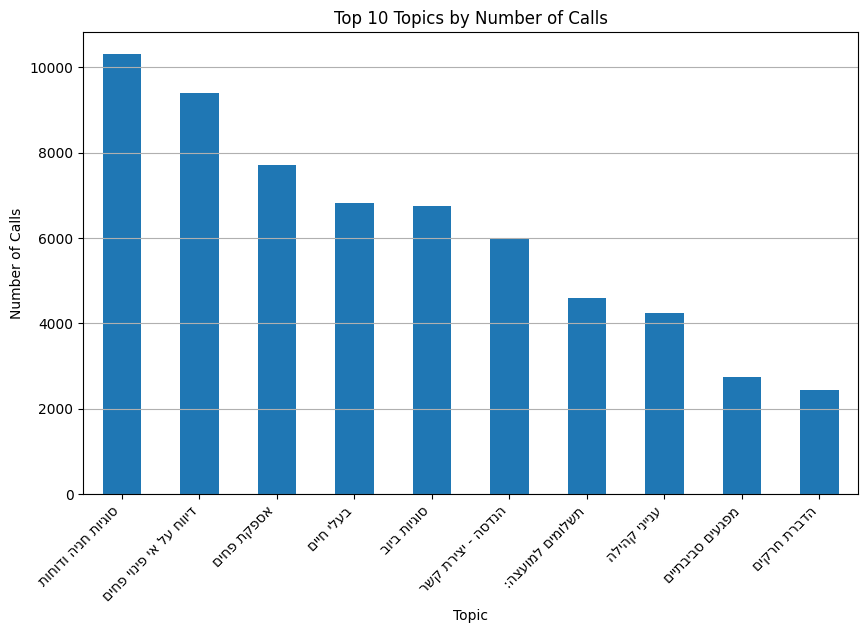

In [35]:
# Calls by Topic (Top 10)
if 'נושא' in data.columns:
    topic_counts = data['נושא'].value_counts().head(10)
    topic_counts.index = topic_counts.index.map(lambda x: x[::-1])  # Reverse Hebrew text
    topic_counts.plot(kind='bar')
    plt.title('Top 10 Topics by Number of Calls')
    plt.xlabel('Topic')
    plt.ylabel('Number of Calls')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ 'נושא' column not found.")


## 📚 Calls by Topic (Top 10)

This chart presents the top 10 service call topics.
Understanding the most common issues helps prioritize services.


C:\Users\mevas\AppData\Local\Temp\ipykernel_35548\329485806.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['שעת פתיחה'] = pd.to_datetime(data['שעת פתיחה'], errors='coerce')


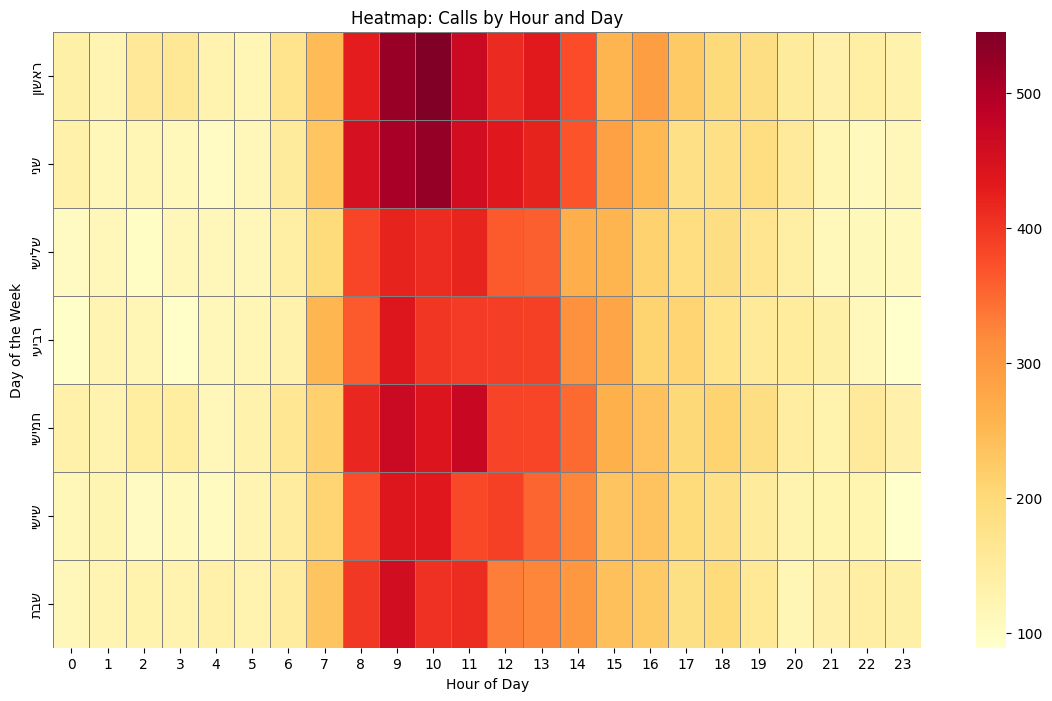

In [38]:
# Heatmap: Calls by Opening Hour and Day of the Week
if 'שעת פתיחה' in data.columns and 'יום בשבוע' in data.columns:
    # Convert 'שעת פתיחה' to hour number directly without creating new column
    data['שעת פתיחה'] = pd.to_datetime(data['שעת פתיחה'], errors='coerce')

    heatmap_data = data.pivot_table(
        index='יום בשבוע',
        columns=data['שעת פתיחה'].dt.hour,  # 🔥 להוציא שעה ישירות
        aggfunc='size',
        fill_value=0
    )

    # Reorder days (Hebrew)
    weekday_order = ['ראשון', 'שני', 'שלישי', 'רביעי', 'חמישי', 'שישי', 'שבת']
    heatmap_data = heatmap_data.reindex(weekday_order)

    # Reverse Hebrew weekday names for display
    heatmap_data.index = heatmap_data.index.map(lambda x: x[::-1])

    # Plot
    plt.figure(figsize=(14,8))
    sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
    plt.title('Heatmap: Calls by Hour and Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of the Week')
    plt.show()
else:
    print("⚠️ 'שעת פתיחה' and/or 'יום בשבוע' column not found.")


## 🔥 Heatmap: Calls by Hour and Day of the Week

The heatmap illustrates the distribution of service calls across different hours of the day and days of the week.
It highlights peak demand times that require operational focus.


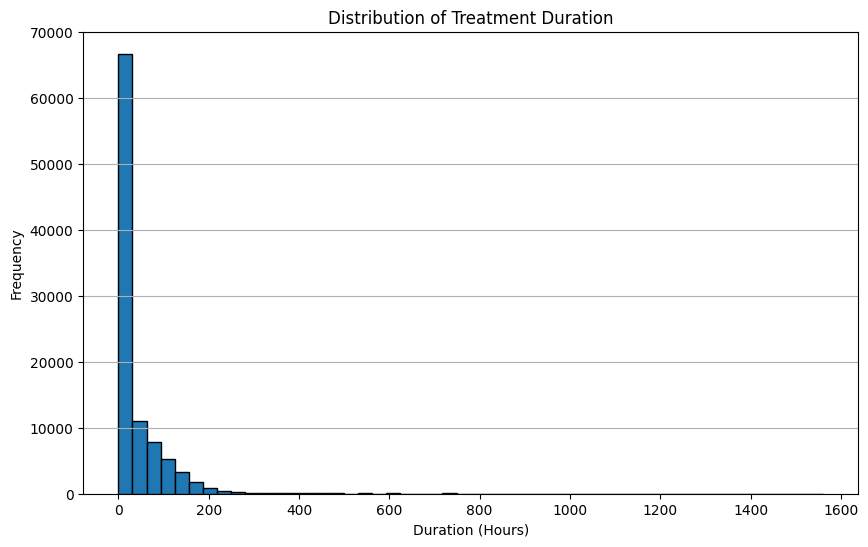

In [40]:
# Distribution of Treatment Duration
if 'משך טיפול (בשעות עבודה)' in data.columns:
    data['משך טיפול (בשעות עבודה)'].plot(kind='hist', bins=50, edgecolor='black')
    plt.title('Distribution of Treatment Duration')
    plt.xlabel('Duration (Hours)')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ 'משך טיפול (בשעות עבודה)' column not found.")


## ⏳ Distribution of Treatment Duration

This histogram shows the distribution of service handling times in hours.
It helps identify common durations and potential outliers.


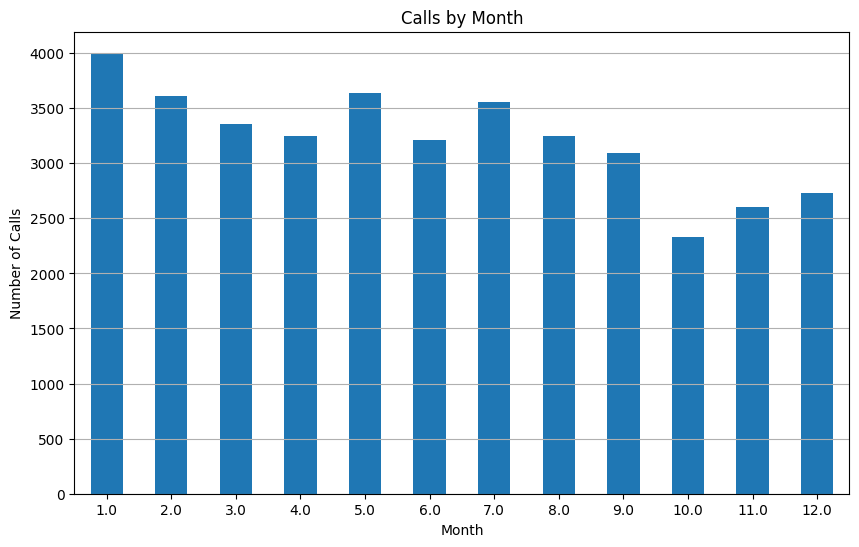

In [41]:
# Calls by Month of the Year
if 'תאריך פתיחה' in data.columns:
    data['תאריך פתיחה'] = pd.to_datetime(data['תאריך פתיחה'], errors='coerce')
    data['חודש'] = data['תאריך פתיחה'].dt.month
    month_counts = data['חודש'].value_counts().sort_index()
    month_counts.plot(kind='bar')
    plt.title('Calls by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Calls')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()
else:
    print("⚠️ 'תאריך פתיחה' column not found.")


## 📆 Calls by Month

This chart shows how service call volume varies across different months.
It helps identify seasonal trends.
